***CLAHE***

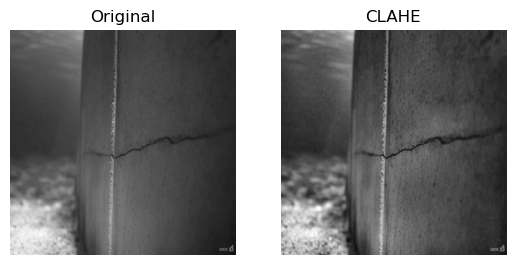

In [2]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path, 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(img)

plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(enhanced, cmap='gray'); plt.title("CLAHE"); plt.axis('off')
plt.show()


***BILLATERAL FILTER***

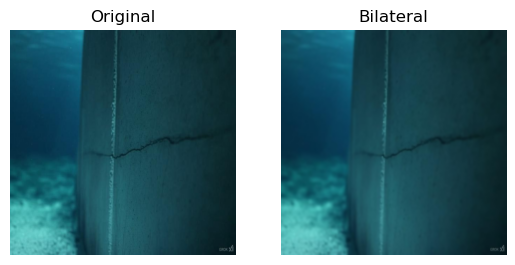

In [3]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
enhanced = cv2.bilateralFilter(img, 9, 75, 75)

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("Bilateral"); plt.axis('off')
plt.show()


***WHITE BALANCING***

In [4]:
import cv2
import matplotlib.pyplot as plt

def white_balance(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = lab[:, :, 1].mean()
    avg_b = lab[:, :, 2].mean()
    lab[:, :, 1] -= (avg_a - 128) * (lab[:, :, 0] / 255.0) * 1.1
    lab[:, :, 2] -= (avg_b - 128) * (lab[:, :, 0] / 255.0) * 1.1
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
enhanced = white_balance(img)

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("White Balanced"); plt.axis('off')
plt.show()


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

***FAST NON-LOCAL BALANCING***

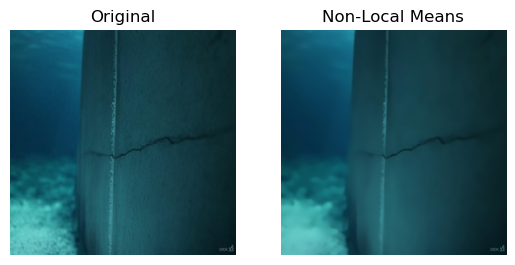

In [5]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
enhanced = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("Non-Local Means"); plt.axis('off')
plt.show()


***RED COMPENSATION***

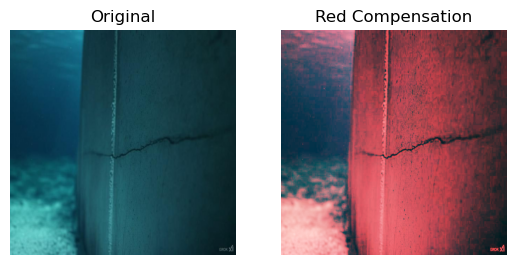

In [6]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
b, g, r = cv2.split(img)
r = cv2.equalizeHist(r)
enhanced = cv2.merge((b, g, r))

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("Red Compensation"); plt.axis('off')
plt.show()


***BUBBLE REMOVAL***

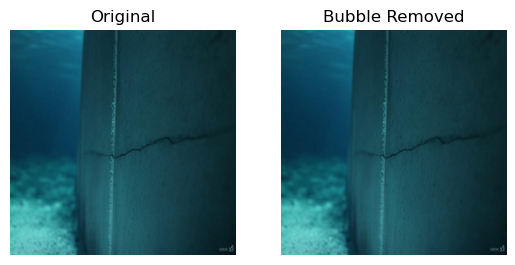

In [7]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
enhanced = cv2.inpaint(img, mask_cleaned, 3, cv2.INPAINT_TELEA)

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("Bubble Removed"); plt.axis('off')
plt.show()


***HISTOGRAM EQUALIZATION***

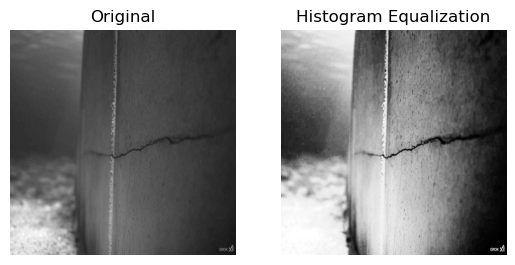

In [8]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path, 0)
enhanced = cv2.equalizeHist(img)

plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(enhanced, cmap='gray'); plt.title("Histogram Equalization"); plt.axis('off')
plt.show()


***OTZU BINARIZATION***

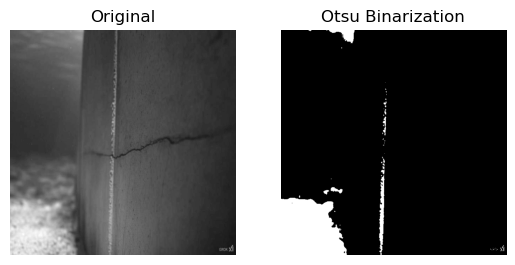

In [9]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path, 0)
_, enhanced = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(enhanced, cmap='gray'); plt.title("Otsu Binarization"); plt.axis('off')
plt.show()


***WAVELET DECOMPOSITION***

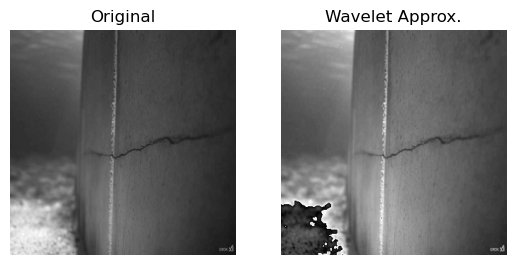

In [10]:
import cv2
import pywt
import matplotlib.pyplot as plt
import numpy as np

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path, 0)
cA, _ = pywt.dwt2(img, 'haar')
cA = np.uint8(cA)

plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cA, cmap='gray'); plt.title("Wavelet Approx."); plt.axis('off')
plt.show()


***ADAPTIVE SATURATION***

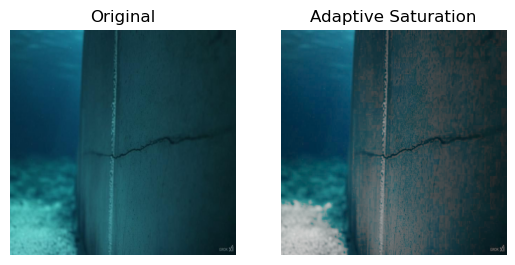

In [11]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
s = cv2.equalizeHist(s)
enhanced = cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2BGR)

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("Adaptive Saturation"); plt.axis('off')
plt.show()


***MEDIAN BLUR AND GAUSSIAN BLUR***

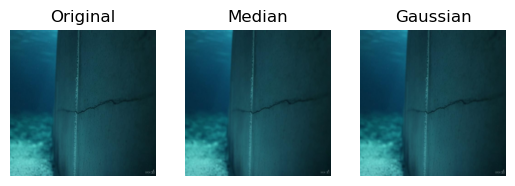

In [12]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
median = cv2.medianBlur(img, 5)
gaussian = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB)); plt.title("Median"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB)); plt.title("Gaussian"); plt.axis('off')
plt.show()


***ADDITION AND SUBTRACTION***

***ADDWEIGHTED AND CONVERTSCALEABS FUNCTION***

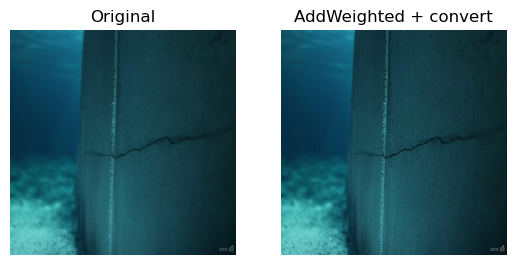

In [13]:
import cv2
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)
blurred = cv2.GaussianBlur(img, (9, 9), 10)
blended = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
enhanced = cv2.convertScaleAbs(blended)

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("AddWeighted + convert"); plt.axis('off')
plt.show()


***SHARPENING AND LAPLACIAN SHARPENING***

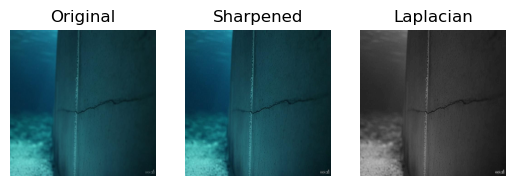

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
img = cv2.imread(path)

# Normal sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharp = cv2.filter2D(img, -1, kernel)

# Laplacian
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = cv2.convertScaleAbs(gray - lap)

plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)); plt.title("Sharpened"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(lap, cmap='gray'); plt.title("Laplacian"); plt.axis('off')
plt.show()


***PIPELINE CONFIGURATION (RAW IMAGE --> CLAHE --> BILLATERAL FILTER --> WHITE BALANCING --> BILLATERAL FILTER --> FAST NON LOCAL BALANCING -- RESULTANT IMAGE )***

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def apply_clahe(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)
    return cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2BGR)

def apply_bilateral(img):
    return cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

def apply_white_balance(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = lab[:, :, 1].mean()
    avg_b = lab[:, :, 2].mean()
    lab[:, :, 1] -= ((avg_a - 128) * (lab[:, :, 0] / 255.0) * 1.1)
    lab[:, :, 2] -= ((avg_b - 128) * (lab[:, :, 0] / 255.0) * 1.1)
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

def apply_non_local_denoising(img):
    return cv2.fastNlMeansDenoisingColored(img, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

def show_images(before, after):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(before, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(after, cv2.COLOR_BGR2RGB))
    plt.title("Final Enhanced Image")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# =============== MAIN PIPELINE =================

input_path = r'C:\Users\Wilfred Auxilian\Desktop\img3.jpg'
raw = cv2.imread(input_path)

# Apply sequential processing
step1 = apply_clahe(raw)
step2 = apply_bilateral(step1)
step3 = apply_white_balance(step2)
step4 = apply_bilateral(step3)
final = apply_non_local_denoising(step4)

# Show original and final result
show_images(raw, final)


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'